In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import joblib
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

data = pd.read_csv('/kaggle/input/human-disease-prediction-dataset/Testing.csv')

In [4]:
data_test = pd.read_csv('Testing.csv')

In [5]:
data_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [6]:
data_train = pd.read_csv('Training.csv')

In [7]:
data_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [8]:
import pandas as pd

# Load training dataset
data_train = pd.read_csv("Training.csv")  # Adjust filename if different

# Display unique diseases and sample data
print("Unique Diseases in Dataset:", data_train["prognosis"].unique())
print("\nSample Data:\n", data_train.head())


Unique Diseases in Dataset: ['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']

Sample Data:
    itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1     

In [9]:
print(data_train[data_train["prognosis"] == "Tuberculosis"])
print(data_train[data_train["prognosis"] == "Malaria"])

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
250         0          0                     0                    0   
251         0          0                     0                    0   
252         0          0                     0                    0   
253         0          0                     0                    0   
254         0          0                     0                    0   
...       ...        ...                   ...                  ...   
4740        0          0                     0                    0   
4781        0          0                     0                    0   
4822        0          0                     0                    0   
4863        0          0                     0                    0   
4904        0          0                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
250           0       1           0             0        0         

In [10]:
data_train.drop(columns=["Unnamed: 133"], inplace=True)
y_test = data_test[["prognosis"]]
data_test.drop(columns=["prognosis"],inplace = True)

In [11]:
data_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [13]:
y_test

,prognosis
0,Fungal infection
1,Allergy
2,GERD
3,Chronic cholestasis
4,Drug Reaction
5,Peptic ulcer diseae
6,AIDS
7,Diabetes
8,Gastroenteritis
9,Bronchial Asthma


In [14]:
data_train.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [15]:
data_test.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
small_dents_in_nails    0
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
Length: 132, dtype: int64

In [16]:
x_train = data_train.drop(columns =["prognosis"])

In [17]:
x_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [18]:
y_train = data_train[["prognosis"]]
x_test = data_test

In [19]:
import json

# Get symptom column names (excluding the disease column)
symptom_columns = x_train.columns  # Only symptom features

# Create symptom index mapping
symptom_index = {symptom: idx for idx, symptom in enumerate(symptom_columns)}

# Save as JSON
with open("symptom_index.json", "w") as f:
    json.dump(symptom_index, f, indent=4)

print("symptom_index.json created successfully!")


symptom_index.json created successfully!


In [20]:
y_train


,prognosis
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection
...,...
4915,(vertigo) Paroymsal Positional Vertigo
4916,Acne
4917,Urinary tract infection
4918,Psoriasis


In [21]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the

In [22]:
classifier = GridSearchCV(RandomForestClassifier(n_jobs = -1, random_state = 42),{
'n_estimators' :[50,75,],
'criterion':['gini',],
'max_depth':[7,15],
    'min_samples_split':[2,3],
    'max_features':['sqrt'],
    'bootstrap':[True]
})
classifier.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'max_depth': [7, 15], 'max_features': ['sqrt'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 75]})

In [23]:
clf_df = pd.DataFrame(classifier.cv_results_)
clf_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_bootstrap', 'param_criterion', 'param_max_depth',
       'param_max_features', 'param_min_samples_split', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [24]:
clf_df[['param_bootstrap', 'param_criterion', 'param_max_depth',
       'param_max_features', 'param_min_samples_split', 'param_n_estimators','mean_test_score']].sort_values(by = 'mean_test_score',ascending=False).head()

,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,mean_test_score
7,True,gini,15,sqrt,3,75,1.000000
6,True,gini,15,sqrt,3,50,1.000000
5,True,gini,15,sqrt,2,75,1.000000
4,True,gini,15,sqrt,2,50,1.000000
3,True,gini,7,sqrt,3,75,0.997561


In [25]:
best_param = classifier.best_params_
best_param

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 50}

In [26]:
model = RandomForestClassifier(n_jobs=-1,random_state=42,bootstrap=True,criterion='gini',max_depth=15,max_features='sqrt',min_samples_split=2,n_estimators=75)

In [27]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=75, n_jobs=-1,
                       random_state=42)

[Text(0.675561797752809, 0.96875, 'congestion <= 0.5\ngini = 0.975\nsamples = 3104\nvalue = [116.0, 103.0, 108.0, 124.0, 109.0, 119.0, 113.0, 118.0\n127.0, 134.0, 120.0, 131.0, 110.0, 101.0, 130.0, 106.0\n127.0, 111.0, 135.0, 118.0, 138.0, 130.0, 129.0, 101.0\n116.0, 102.0, 109.0, 138.0, 133.0, 135.0, 106.0, 124.0\n117.0, 128.0, 138.0, 114.0, 110.0, 123.0, 142.0, 120.0\n107.0]'),
 Text(0.6530898876404494, 0.90625, 'stomach_bleeding <= 0.5\ngini = 0.975\nsamples = 3028\nvalue = [116.0, 103.0, 108.0, 124.0, 109.0, 119.0, 113.0, 118.0\n127.0, 134.0, 0.0, 131.0, 110.0, 101.0, 130.0, 106.0\n127.0, 111.0, 135.0, 118.0, 138.0, 130.0, 129.0, 101.0\n116.0, 102.0, 109.0, 138.0, 133.0, 135.0, 106.0, 124.0\n117.0, 128.0, 138.0, 114.0, 110.0, 123.0, 142.0, 120.0\n107.0]'),
 Text(0.6643258426966292, 0.9375, 'True  '),
 Text(0.6306179775280899, 0.84375, 'red_sore_around_nose <= 0.5\ngini = 0.974\nsamples = 2955\nvalue = [116.0, 103.0, 108.0, 124.0, 109.0, 119.0, 113.0, 118.0\n127.0, 134.0, 0.0, 131.0

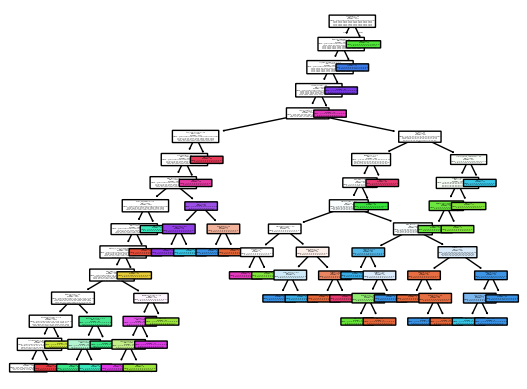

In [28]:
plot_tree(model.estimators_[2],feature_names = x_train.columns,filled=True,rounded=True)

In [29]:
print(model.score(x_train,y_train)*100)
print(model.score(x_test,y_test)*100)

100.0
97.61904761904762


In [30]:
pred = model.predict(x_test)

In [31]:
print(classification_report(y_test,pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

In [32]:

joblib.dump(model, 'medicine_recommendation_model.pkl')


['medicine_recommendation_model.pkl']

In [33]:

model = joblib.load('medicine_recommendation_model.pkl')
